In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [7]:
# View first 5 rows in class 'measurement'
engine.execute('SELECT * FROM measurement LIMIT 20').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0),
 (13, 'USC00519397', '2010-01-15', 0.0, 65.0),
 (14, 'USC00519397', '2010-01-16', 0.0, 68.0),
 (15, 'USC00519397', '2010-01-17', 0.0, 64.0),
 (16, 'USC00519397', '2010-01-18', 0.0, 72.0),
 (17, 'USC00519397', '2010-01-19', 0.0, 66.0),
 (18, 'USC00519397', '2010-01-20', 0.0, 66.0),
 (19, 'USC00519397', '2010-01-21', 0.0, 69.0),
 (20, 'USC00519397', '2010-01-22', 0.0, 67.0)]

In [8]:
# View first 5 rows in class 'station'
engine.execute('SELECT * FROM station LIMIT 30').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [9]:
#Get columns in each class
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'],c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
#Get columns in each class
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'],c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [12]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

# Exploratory Precipitation Analysis

In [13]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
# date = dt.datetime (2010, 1,1)
# recent_date = session.query(Measurement.date).fliter(Measurement.date > date).all()
print(recent_date)

('2017-08-23',)


In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.

query_date = dt.date (2017,8,23) - dt.timedelta(days = 365)
print("Query_date :", query_date)

Query_date : 2016-08-23


In [15]:
# Perform a query to retrieve the date and precipitation scores
data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= query_date).all()
for record in data:
    print(record)

('2016-08-23', 0.0)
('2016-08-24', 0.08)
('2016-08-25', 0.08)
('2016-08-26', 0.0)
('2016-08-27', 0.0)
('2016-08-28', 0.01)
('2016-08-29', 0.0)
('2016-08-30', 0.0)
('2016-08-31', 0.13)
('2016-09-01', 0.0)
('2016-09-02', 0.0)
('2016-09-03', 0.0)
('2016-09-04', 0.03)
('2016-09-05', None)
('2016-09-06', None)
('2016-09-07', 0.05)
('2016-09-08', 0.0)
('2016-09-09', 0.03)
('2016-09-10', 0.0)
('2016-09-11', 0.05)
('2016-09-12', 0.0)
('2016-09-13', 0.02)
('2016-09-14', 1.32)
('2016-09-15', 0.42)
('2016-09-16', 0.06)
('2016-09-17', 0.05)
('2016-09-18', 0.0)
('2016-09-19', 0.0)
('2016-09-20', 0.0)
('2016-09-21', 0.0)
('2016-09-22', 0.02)
('2016-09-23', 0.0)
('2016-09-24', 0.0)
('2016-09-25', 0.0)
('2016-09-26', 0.06)
('2016-09-27', 0.02)
('2016-09-28', 0.0)
('2016-09-29', 0.0)
('2016-09-30', 0.0)
('2016-10-01', 0.0)
('2016-10-02', 0.0)
('2016-10-03', 0.0)
('2016-10-04', 0.0)
('2016-10-05', 0.0)
('2016-10-06', 0.0)
('2016-10-07', 0.0)
('2016-10-08', 0.0)
('2016-10-09', 0.0)
('2016-10-10', 0.0)
('

('2017-08-16', 0.0)
('2017-08-17', 0.0)
('2017-08-18', 0.0)
('2017-08-19', 0.0)
('2017-08-20', 0.01)
('2017-08-21', 0.02)
('2017-08-23', 0.0)
('2016-08-23', None)
('2016-08-24', None)
('2016-08-25', 0.0)
('2016-08-26', 0.04)
('2016-08-29', None)
('2016-08-30', 0.02)
('2016-08-31', None)
('2016-09-01', None)
('2016-09-02', None)
('2016-09-08', None)
('2016-09-09', None)
('2016-09-12', None)
('2016-09-13', None)
('2016-09-14', None)
('2016-09-15', None)
('2016-09-16', 0.0)
('2016-09-19', None)
('2016-09-20', 0.0)
('2016-09-22', 0.06)
('2016-09-23', 0.0)
('2016-09-26', None)
('2016-09-28', 0.0)
('2016-09-29', 0.04)
('2016-09-30', None)
('2016-10-03', None)
('2016-10-04', None)
('2016-10-05', None)
('2016-10-06', 0.07)
('2016-10-07', None)
('2016-10-11', None)
('2016-10-13', None)
('2016-10-17', None)
('2016-10-18', None)
('2016-10-19', None)
('2016-10-20', None)
('2016-10-21', None)
('2016-10-24', None)
('2016-10-25', 0.4)
('2016-10-26', 0.2)
('2016-10-27', None)
('2016-10-28', None)
('20

('2017-07-24', 0.61)
('2017-07-25', 0.11)
('2017-07-26', 0.12)
('2017-07-27', 0.01)
('2017-07-28', 0.09)
('2017-07-29', 0.23)
('2017-07-30', 0.0)
('2017-07-31', 0.0)
('2017-08-04', 0.0)
('2017-08-05', 0.06)
('2017-08-06', 0.0)
('2017-08-13', 0.0)
('2017-08-14', 0.0)
('2017-08-15', 0.32)
('2017-08-16', 0.12)
('2017-08-17', 0.01)
('2017-08-18', 0.06)
('2016-08-23', 0.7)
('2016-08-24', 1.45)
('2016-08-25', 0.11)
('2016-08-27', None)
('2016-08-28', 2.07)
('2016-08-29', 0.9)
('2016-08-30', 0.05)
('2016-08-31', 2.46)
('2016-09-01', 0.01)
('2016-09-02', 0.03)
('2016-09-03', 1.0)
('2016-09-04', 0.44)
('2016-09-05', 0.18)
('2016-09-06', 1.0)
('2016-09-07', 1.35)
('2016-09-08', 0.15)
('2016-09-09', 0.35)
('2016-09-10', 1.16)
('2016-09-11', 0.6)
('2016-09-12', 1.04)
('2016-09-13', 1.2)
('2016-09-14', 6.7)
('2016-09-15', 3.35)
('2016-09-16', 0.61)
('2016-09-17', 0.23)
('2016-09-18', 0.42)
('2016-09-19', 0.25)
('2016-09-20', 0.43)
('2016-09-21', 1.02)
('2016-09-22', 0.75)
('2016-09-23', 0.33)
('201

In [49]:
# Save the query results as a Pandas DataFrame and set the index to the date column
hawaii_df = pd.DataFrame(data, columns = ["date", "prcp"])
# hawaii_df = pd.DataFrame(hawaii_df, columns =['date', 'prcp'])
hawaii_df.rename(columns = {'date' : 'Date', 'prcp' : 'precipitation'}, inplace = True)
hawaii_df.set_index("Date", inplace=True)
hawaii_df = hawaii_df.sort_values(["Date"])
hawaii_df.head()

,precipitation
Date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


In [39]:
# Sort the dataframe by date
# hawaii_weather_df = hawaii_df.sort_values(["date"])
# hawaii_weather_df.head()
# hawaii_df['date'] = pd.to_datetime(hawaii_df['date'], format = datetime)

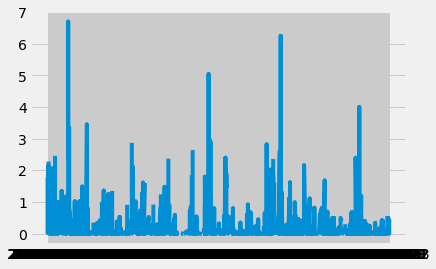

In [52]:
# Use Pandas Plotting with Matplotlib to plot the data

plt.plot(hawaii_df.index, hawaii_df['precipitation']) #marker = '.')
# plt.tight_layout()
plt.show()
# hawaii_weather_df

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()